In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

### Line Chart Customizing

In [3]:
df_da['job_posted_month'] = df_da['job_posted_date'].dt.month
df_da_exploded = df_da.explode(['job_skills'])

df_da_pivot = df_da_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()

df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')

df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


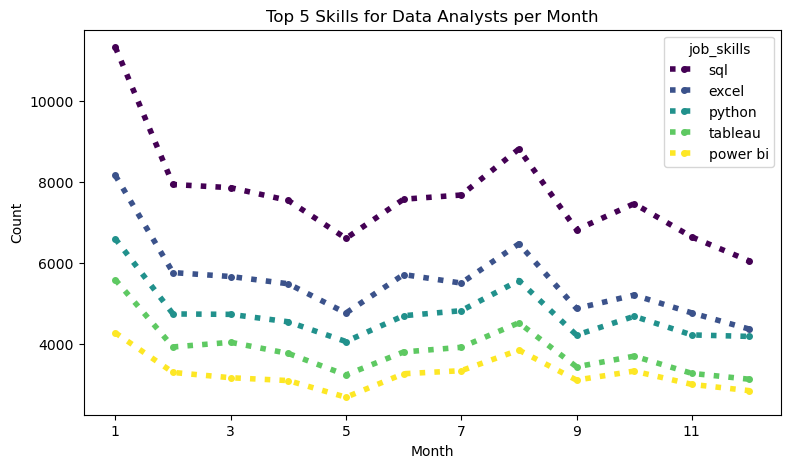

In [4]:
df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: '-', '--', '-.', ':'
    colormap='viridis',
    marker='o',
    markersize=4,
    figsize=(9, 5)
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### Scatter Chart Customizing

In [ ]:
df_exploded = df_da.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)

skill_count = 20
skills_stats = skill_stats.sort_values(by='skill_count', ascending = False).head(skill_count)

skill_stats

In [ ]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Job Count for Top 10 Skills')
plt.xlabel('Job Postings')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

In [ ]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.title('Salary vs. Job Count for Top 10 Skills')
plt.xlabel('Job Posting Counts')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()
plt.show()

## Practice Problems

### Job Postings Trend for Cloud Engineers
Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

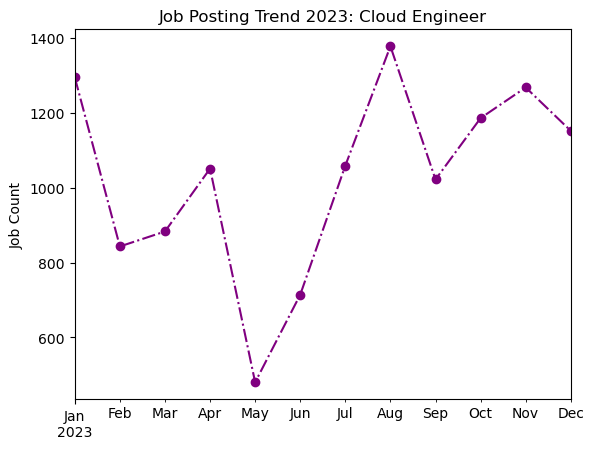

In [64]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
ce_postings = df_ce.groupby('job_posted_month').size()
ce_postings.plot(
    kind='line',
    linestyle='-.',
    color='purple',
    marker='o'
)
plt.title('Job Posting Trend 2023: Cloud Engineer')
plt.xlabel('')
plt.ylabel('Job Count')
plt.show()

### Customize Bar Chart
Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:
- Create a DataFrame called SDA_df. 
- Customize the plot by setting the bar colors to 5 different colors with the variable colors.
- Add a grid to the y-axis only and making it dashes.
- Rotate the x-axis labels by 45 degrees.
- Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

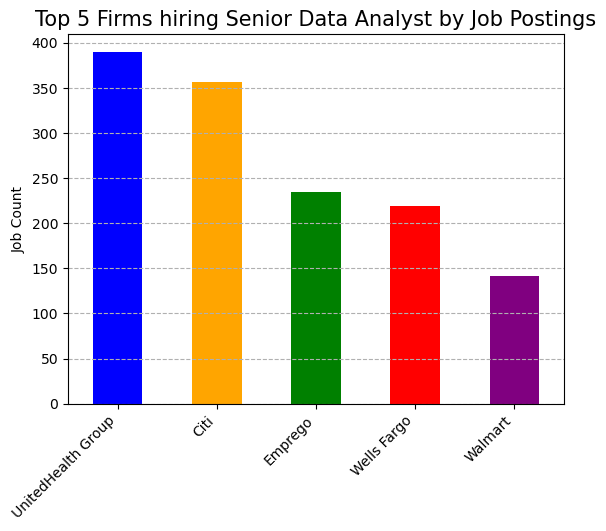

In [96]:
df_sda = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
df_top_sda_firm = df_sda.groupby('company_name').size().sort_values(ascending=False).head(5)

colors = ['blue', 'orange', 'green', 'red', 'purple']

df_top_sda_firm.plot(
    kind='bar',
    color = colors
)

plt.title('Top 5 Firms hiring Senior Data Analyst by Job Postings', fontsize=15)
plt.xlabel('')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()